# Learning how to do AI for MDP


In [134]:
import numpy as np
import matplotlib.pyplot as plt
from seaborn import heatmap
import networkx as nx
import queue
import tkinter as tk
from tkinter import ttk

LARGE_FONT = ("Verdana 12")



In [83]:
#Trying Out tkinter to simulate Andriod. #mainly  for trolling
import tkinter as tk
from tkinter import ttk
from tkinter import *
from PIL import Image,ImageTk
import time

class BackgroundFrame(tk.Tk):
    def __init__(self,*args,**kwargs): #args = arguments, kwargs refers to keyword arguments.
        tk.Tk.__init__(self,*args,**kwargs)     #initialize tkinter

#         tk.Tk.iconbitmap(self, default = "sanicisgood.ico")
#         tk.Tk.wm_title(self, "Gotta GO fast")
        
        ws = self.winfo_screenwidth() #get the pixels lengths  for width
        hs = self.winfo_screenheight() #get the  pixel lengths for the height
        print(ws,hs)
        self.geometry('%dx%d'%(ws*0.5,hs*0.5)) #make the window almost to the full screen
        
    
        container = tk.Frame(height = hs*0.5, width = ws*0.5)
        container.pack(side="top",fill="both", expand=True )
        
        #fill will fill in the space that is allocated in
        #expand is beyond the limits that you set.
        
       
        container.grid_rowconfigure(0,weight=1) #0 is the setting of minimum size
        container.grid_columnconfigure(0,weight=1) #weight is the priority
        frame  = mainPage(container,self)
        frame.grid(row=0, column= 0, sticky= "nsew")
        self.tkraise()
        
    
        
class mainPage(tk.Frame): #inherits from tk.frame
        def __init__(self, parent, controller):
            self.controller = controller
            tk.Frame.__init__(self,parent)
            w= self.winfo_screenwidth() *0.5-30
            h = self.winfo_screenheight()*0.5-30

            self.viewGrid = Canvas(self, width=w, height=h,bg="#ddd")
            self.viewGrid.pack(side="top", fill= "both", expand = True)
            ADD = ttk.Button(self, text="Add Entry Boxes", command = self.getdirections)
            ADD.pack(side="right", ipady=0, ipadx=7)
            
            gridWidth= int(w/20)
            gridHeight = 34
            
            print(gridWidth, gridHeight)
            rowNumber = 0
            for row in range(20):
                for col in range(20):
                    rect = self.viewGrid.create_rectangle(col*gridWidth,row*gridHeight, (col+1)*gridWidth, (row+1)*gridHeight, fill = 'grey')
                    self.viewGrid.itemconfigure(rect, tags=(str(row), str(col)))
            
            self.viewGrid.bind("<Button-1>",  self.selectobstacles)
            self.viewGrid.bind("<Button-3>",  self.removeobstacles)
            self.guiobstlist = []
            self.directionwidgetlist = []
            self.labellist = [] #Stores label entries
            
        def selectobstacles(self,event):
            item= self.viewGrid.find_withtag(CURRENT)[0]
            self.viewGrid.itemconfig(item, fill = "yellow")
            value  = list(self.viewGrid.gettags(item))
            value.pop()
            
            self.guiobstlist.append(value)
            self.labellist.append(ttk.Label(self, text=str(value)))
            self.labellist[-1].pack(side="left", ipady=0, ipadx=7)
            
            self.directionwidgetlist.append(ttk.Entry(self, width=5))
            self.directionwidgetlist[-1].pack(side="left", pady=0, padx=0)
            
            #print(self.guiobstlist)
                 
        
        def removeobstacles(self,event):
            item = self.viewGrid.find_withtag(CURRENT)
            self.viewGrid.itemconfig(CURRENT, fill = "Grey")
            value  = list(self.viewGrid.gettags(item))
            value.pop()

            pos = self.guiobstlist.index(value)
            #print(pos)
            
            self.labellist[pos].pack_forget()
            self.directionwidgetlist[pos].pack_forget()
            
            del self.guiobstlist[pos]
            del self.labellist[pos]
            del self.directionwidgetlist[pos]
            
            #print(self.guiobstlist)
            
        def getdirections(self):
            self.directions = []
            for i in self.directionwidgetlist:
                self.directions.append(i.get())
            
            for i in range(len(self.directions)):
                self.guiobstlist[i].append(self.directions[i])
                
            print(self.guiobstlist)
            
        def placeobstacles(self):
            
            obstimg = (Image.open("Obstacle Image.png"))
            resizedobstacle_image = obstimg.resize((34,34), Image.ANTIALIAS)
            
            obstonly = Image.open("Obstacle Only.png")
            resizedobstacle = obstonly.resize((34,34), Image.ANTIALIAS)
            
            self.obstacleArray=[]
            self.obstacleArray2 = [] #contains obstacle w no image
            for x in range(len(self.guiobstlist)):
                rotationalvalue = 0
                xvalue = self.guiobstlist[x][0] * 34+17
                yvalue = self.guiobstlist[x][1] * 34 +17
                
                #print(ObstacleList[x])
                if(ObstacleList[x][2] == 'N'):
                    rotationalvalue  = 90
                elif (ObstacleList[x][2] == 'W'):
                    rotationalvalue  = 180
                elif(ObstacleList[x][2] == 'S'):
                    rotationalvalue= 270
                elif(ObstacleList[x][2] == 'E'):
                    rotationalvalue = 0
                
                if(ObstacleList[x][2] != 'NIL'):
                    self.newobst_image= ImageTk.PhotoImage(resizedobstacle_image.rotate(rotationalvalue))
                    self.obstacleArray.append(self.newobst_image)
                    self.obstacleimage = self.viewGrid.create_image(xvalue,680-yvalue,image=self.obstacleArray[-1])
                else:
                    self.newobst = ImageTk.PhotoImage(resizedobstacle)
                    self.obstacleArray.append(self.newobst)
                    self.obstacleimage = self.viewGrid.create_image(xvalue,680-yvalue,image=self.obstacleArray[-1])

            
            
app = BackgroundFrame()
app.mainloop() #inherited from tkinter



1440 900
34 34


In [175]:
import json
file = "AcquireFromAndriod.json"


maze=[]
for i in range(22):
    inner = []
    for j in  range(22):
        if(i==0 or i ==21):
            inner.append(1)
            continue
        if(j==0 or j==21):
            inner.append(1)
            continue
        inner.append(0)
    maze.append(inner)


with open(file) as json_file:
    obstacles = json.load(json_file)

GOALLIST = []
GOALLIST.append([2, 2, 'E', 0])
ObstacleList = []
#Convert the list of obstacles to fit the tree
for i in range(len(obstacles)):
    obstacles[i][0]+=1
    obstacles[i][1]+=1

    if(obstacles[i][2] == "E"):
        obstacles[i][2] = "S"

    elif(obstacles[i][2] == "N"):
        obstacles[i][2] = "E"

    elif(obstacles[i][2] == "S"):
        obstacles[i][2] = "W"

    elif(obstacles[i][2] == "W"):
        obstacles[i][2] = "N"

print(obstacles)


for i in range(len(obstacles)):
    Direction = obstacles[i][2]
    Xcoords= obstacles[i][0]
    Ycoords = obstacles[i][1]
    obstacleid = obstacles[i][3]
    maze[Xcoords][Ycoords]=1
    if(Direction == "N"):
        maze[Xcoords-2][Ycoords]=0.5
        GOALLIST.append([Xcoords-2,Ycoords,"S", obstacleid])
        ObstacleList.append((Xcoords-1,Ycoords-1,"N"))

    elif(Direction == "S"):
        maze[Xcoords+2][Ycoords]=0.5
        GOALLIST.append([Xcoords+2,Ycoords,"N", obstacleid])
        ObstacleList.append((Xcoords-1,Ycoords-1,"S"))

    elif(Direction == "E"):
        maze[Xcoords][Ycoords+2]=0.5
        GOALLIST.append([Xcoords,Ycoords+2,"W",obstacleid])
        ObstacleList.append((Xcoords-1,Ycoords-1,"E"))

    elif(Direction =="W"):
        maze[Xcoords][Ycoords-2]=0.5
        GOALLIST.append([Xcoords,Ycoords-2,"E",obstacleid])
        ObstacleList.append((Xcoords-1,Ycoords-1,"W"))

    else:
        ObstacleList.append([Xcoords-1,Ycoords-1,"NIL", obstacleid])

print("Obstaclelist=",ObstacleList)
print("Goallist=", GOALLIST)

maze = np.array(maze)






[[2, 8, 'W', 1], [4, 10, 'S', 2]]
Obstaclelist= [(1, 7, 'W'), (3, 9, 'S')]
Goallist= [[2, 2, 'E', 0], [2, 6, 'E', 1], [6, 10, 'N', 2]]


In [176]:
#Helper Function for plotting the maze.

def printBinaryMaze(mazeGrid): #Passing the maze grid as a parameter
    ''' Display the maze corresponding to a binary grid
        Input : 2D NumPy array with 0 and 1 as elements
        Output : Simple print of the corresponding maze
    '''
    (height, width) = mazeGrid.shape
    
    print()
    for i in range(height):
        for j in range(width):
            if mazeGrid[i,j] == 1:
                print("\u25a9", end = " ") 
                # above generatres a block
            elif mazeGrid[i,j] == 0:
                print(".", end = " ")
        print()
        
        
def showBinaryMaze(mazeGrid):
    ''' Display the maze corresponding to a binary grid
        Input : 2D NumPy array with 0 and 1 as elements
        Output : Heatmap grid of the corresponding maze
    '''
    (height, width) = mazeGrid.shape
    mazeGrid = mazeGrid * 255                # just to match standard pixel values (0 to 255) in grayscale
    
    f = plt.figure(figsize = (width,height))
    heatmap(mazeGrid, vmin = 0, vmax = 255, cmap = "Greys", cbar = False)
    
    
def showBinaryMazeProblem(mazeGrid, start, goal):
    ''' Display the maze corresponding to a binary grid
        Display "start" and "goal" position on the grid 
        Input : 2D NumPy array with 0 and 1 as elements
        Input : 2D coordinate of the "start" and "goal"
        Output : Heatmap grid of the maze with markers
    '''
    (height, width) = mazeGrid.shape
    mazeGrid = mazeGrid * 255
    
    mazeGrid[start[1], start[1]] = 128
    mazeGrid[goal[1], goal[1]] = 128
    
    f = plt.figure(figsize = (width,height))
    heatmap(mazeGrid, vmin = 0, vmax = 255, cmap = "Greys", cbar = False)


In [177]:
# # Creating Maze

# maze=[]
# for i in range(22):
#     inner = []
#     for j in  range(22):
#         if(i==0 or i ==21):
#             inner.append(1)
#             continue
#         if(j==0 or j==21):
#             inner.append(1)
#             continue
#         inner.append(0)
#     maze.append(inner)
        
# GOALLIST=[]    
# GOALLIST.append((2, 2, 'E'))


# ObstacleList = []
# num = input("How many obstacles?")
# for i in range(int(num)):
#     Xcoords = int(input("Please Enter the obstacle X coords"))
#     Ycoords = int(input("Please Enter the obstacle Y coords"))
#     Direction = int(input("Please Enter the Image  of the Obstacle, 0: No image, 1: North, 2: South, 3: East, 4:West"))
    
#    #Xcoords == I, Ycoords == J 
    
#     maze[Xcoords][Ycoords]=1
#     if(Direction == 1):
#         maze[Xcoords-2][Ycoords]=0.5
#         GOALLIST.append((Xcoords-2,Ycoords,"S"))
#         ObstacleList.append((Xcoords-1,Ycoords-1,"N"))

#     elif(Direction == 2):
#         maze[Xcoords+2][Ycoords]=0.5
#         GOALLIST.append((Xcoords+2,Ycoords,"N"))
#         ObstacleList.append((Xcoords-1,Ycoords-1,"S"))
        
#     elif(Direction ==3):
#         maze[Xcoords][Ycoords+2]=0.5
#         GOALLIST.append((Xcoords,Ycoords+2,"W"))
#         ObstacleList.append((Xcoords-1,Ycoords-1,"E"))
        
#     elif(Direction ==4):
#         maze[Xcoords][Ycoords-2]=0.5
#         GOALLIST.append((Xcoords,Ycoords-2,"E"))
#         ObstacleList.append((Xcoords-1,Ycoords-1,"W"))
    
#     else:
#         ObstacleList.append((Xcoords-1,Ycoords-1,"NIL"))
        
        
        
# for i in range(len(maze)):
#     print(maze[i],'\n')
    
# print(GOALLIST)
# print(ObstacleList)
# maze = np.array(maze)
        

In [178]:
print(ObstacleList)

[(1, 7, 'W'), (3, 9, 'S')]


In [179]:
def greedy_sort(coordinates):
    path = []
    current_point = coordinates[0]
    while coordinates:
        closest_point = min(coordinates, key=lambda x: ((x[0]-current_point[0])**2 + (x[1]-current_point[1])**2)**0.5)
        path.append(closest_point)
        current_point = closest_point
        coordinates.remove(closest_point)
    return path

In [180]:
GOALLIST

[[2, 2, 'E', 0], [2, 6, 'E', 1], [6, 10, 'N', 2]]

In [181]:
GOALLIST = greedy_sort(GOALLIST)
GOALLIST

[[2, 2, 'E', 0], [2, 6, 'E', 1], [6, 10, 'N', 2]]

In [182]:
Obstaclevisit = []
for i in range(len(GOALLIST)):
    Obstaclevisit.append(GOALLIST[i].pop())
    GOALLIST[i] = tuple(GOALLIST[i])
    
print(Obstaclevisit)
print(GOALLIST)


[0, 1, 2]
[(2, 2, 'E'), (2, 6, 'E'), (6, 10, 'N')]


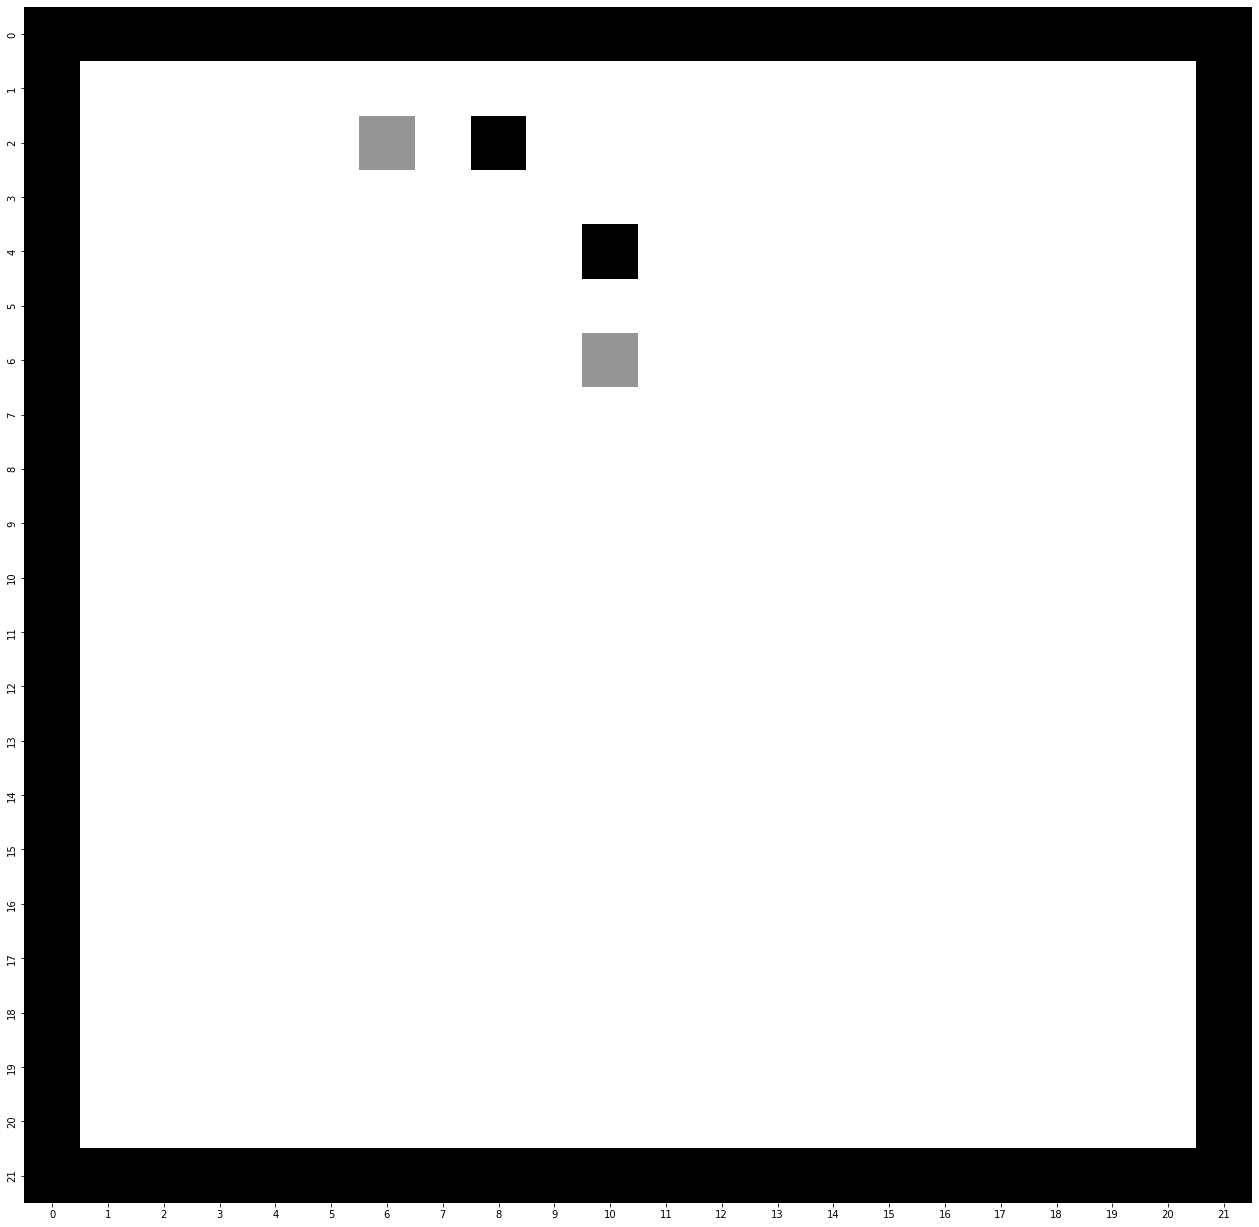

In [183]:
# Show the maze using helper functions
showBinaryMaze(maze)


## How do we define our start and end goal?

In [184]:
#IIRC start position happens on the bottom left of the platform
#End goal for the first assessment refers to the last obstacle furthest from the
#start goal

#For the second assesment, the end goal should be the same as the start goal with
#the start goal being the last obstacle it has to reach.

In [185]:
# Create a Graph class
class MazeGraph(object):
    ''' Class to represent a Graph
        Construction : Using Edges
    '''
    def __init__(self):
        self.edges = {} #why are edges dictionary?
    
    def all_edges(self):
        return self.edges
    
    def neighbors(self, node):
        return self.edges[node]   

In [186]:
# Function to convert a maze to a graph
def maze_to_graph(mazeGrid):
    ''' Converts a 2D binary maze to corresponding graph
        Input : 2D NumPy array with 0 and 1 as elements
        Output : MazeGraph corresponding to input maze
    '''
    
    directions = ["N","S","E", "W"]
    mazeGraph = MazeGraph() #this initialize the class to mazeGraph
    (height, width) = mazeGrid.shape #numpy array dimensions into a tuple?
    
    for i in range(height):
        for j in range(width):
            
            # Only consider blank cells as nodes
            #Instead of consdiering blank cells as nodes, try to allow obstacles to be nodes.
            if mazeGrid[i,j] != 1:

                
                # Adjacent cell : Top
                
                for d in directions:
                    neighbors = []
#                 if (i> 1) and mazeGrid[i-2,j] != 1 and mazeGrid[i-2,j+1] !=1 and mazeGrid[i-2, j-1]!=1:  #if the mazegrid is top is not an obstacle
#                     neighbors.append(((i-1,j), 1)) #append a tuple in a tuple to the neighbour
                
                
#                 # Adjacent cell : Left                
#                 if (j> 1)  and mazeGrid[i,j-2] != 1 and mazeGrid[i-1, j-2] !=1 and mazeGrid[i+1, j-2]!=1:
#                     neighbors.append(((i,j-1), 1))

                    
#                 # Adjacent cell : Bottom                    
#                 if (i < height - 2)  and  mazeGrid[i+2,j] != 1 and mazeGrid[i+2,j+1] != 1 and mazeGrid[i+2,j-1] != 1:
#                     neighbors.append(((i+1,j), 1))
     
#                 # Adjacent cell : Right                    
#                 if (j < width - 2)  and mazeGrid[i,j+2] != 1 and mazeGrid[i-1,j+2] != 1 and mazeGrid[i+1,j+2] != 1: #this check maybe out of range
#                     neighbors.append(((i,j+1), 1))
                
                #moveforwardinthecurrentdirection. 
                    
        
                    if(d=="N"):
                        #move forward
                        if(i>1) and mazeGrid[i-2,j]!=1 and mazeGrid[i-2, j+1]!=1 and mazeGrid[i-2,j-1]!=1:
                            neighbors.append(((i-1,j,d),1,["FW010"]))
                        
                        #move backwards
                        if (i < height - 2)  and  mazeGrid[i+2,j] != 1 and mazeGrid[i+2,j+1] != 1 and mazeGrid[i+2,j-1] != 1:
                            neighbors.append(((i+1,j,d),1,["BW010"]))
                            
                        #forward left turn
                        exit = False
                        if (j>3 and i>3): #ensure that it is within the border
                            for row in range(1,4):
                                if exit ==True:
                                    break
                                for col in range(1,4):
                                    if(mazeGrid[i-row,j-col]==1):
                                        exit=True
                                        break
                                    if(mazeGrid[i-row,j-1]==1 or mazeGrid[i-row,j]==1 or mazeGrid[i-row,j+1]==1):
                                        exit =True
                                        break
                        else:
                            exit=True
                                    
                        if (exit==False):    
                            neighbors.append(((i-2, j-2,"W"),100,["FL090"])) #increase weights to reduce turning 
                            
                        
                        #forward right turning 
                        exit = False
                        if(i>3 and j< width-4):
                            for row in range(1,4):
                                if exit == True:
                                    break
                                for col in range(1,4):
                                    if(mazeGrid[i-row,j+col]==1):
                                        exit=True
                                        break
                                    if(mazeGrid[i-row,j-1]==1 or mazeGrid[i-row,j]==1 or mazeGrid[i-row,j+1]==1):
                                        exit =True
                                        break
                        else:
                            exit=True
                            
                        if exit==False:    
                            neighbors.append(((i-2, j+2,"E" ),100, ["FR090"])) #increase weights to reduce turning    
                        
                        #Backward left Turning
                        exit=False
                        if(i< height-4 and j>3):
                            for row in range(1,4):
                                if exit==True:
                                    break
                                for col in range(1,4):
                                    if(mazeGrid[i+row, j-col]==1):
                                        exit=True
                                        break
                                    if(mazeGrid[i+row, j-1] ==1 or mazeGrid[i+row, j] ==1 or mazeGrid[i+row, j+1] ==1):
                                        exit=True
                                        break
                        else:
                            exit=True
                            
                        if exit==False:    
                            neighbors.append(((i+2, j-2,"E"),100, ["BL090"])) #increase weights to reduce turning         
                        
                        #Backwards Right Turning
                        exit = False
                        if(i<height-4 and j<width-4):
                            for row in range(1,4):
                                if exit==True:
                                    break
                                for col in range(1,4):
                                    if(mazeGrid[i+row, j+col]==1):
                                        exit=True
                                        break
                                    if(mazeGrid[i+row, j-1] ==1 or mazeGrid[i+row, j] ==1 or mazeGrid[i+row, j+1] ==1):
                                        exit=True
                                        break
                        else:
                            exit=True
                            
                        if exit==False:    
                            neighbors.append(((i+2, j+2,"W"),100,["BR090"])) #increase weights to reduce turning     
                        
                        
                        # Insert edges in the graph
                        if len(neighbors) > 0: #if there exist neighbors
                            mazeGraph.edges[(i,j,d)] = neighbors
                            
                    if(d=="S"): #Vehicle is currently facing south
                        #move forwards
                        if (i < height - 2)  and  mazeGrid[i+2,j] != 1 and mazeGrid[i+2,j+1] != 1 and mazeGrid[i+2,j-1] != 1:
                            neighbors.append(((i+1,j,d),1, ["FW010"]))
                        
                        #move backwards
                        if(i>1) and mazeGrid[i-2,j]!=1 and mazeGrid[i-2, j+1]!=1 and mazeGrid[i-2,j-1]!=1:
                            neighbors.append(((i-1,j,d),1, ["BW010"]))
                            
                        
                        #move forward left turning
                        exit = False
                        if(i<height-4 and j<width-4):
                            for row in range(1,4):
                                if exit==True:
                                    break
                                for col in range(1,4):
                                    if(mazeGrid[i+row, j+col]==1):
                                        exit=True
                                        break
                                    if(mazeGrid[i+row, j-1] ==1 or mazeGrid[i+row, j] ==1 or mazeGrid[i+row, j+1] ==1):
                                        exit=True
                                        break
                        else:
                            exit=True
                            
                        if exit==False:    
                            neighbors.append(((i+2, j+2,"E"),100, ["FL090"])) #increase weights to reduce turning   
                        
                        #move forward right turning
                        exit=False
                        if(i< height-4 and j>3):
                            for row in range(1,4):
                                if exit==True:
                                    break
                                for col in range(1,4):
                                    if(mazeGrid[i+row, j-col]==1):
                                        exit=True
                                        break
                                    if(mazeGrid[i+row, j-1] ==1 or mazeGrid[i+row, j] ==1 or mazeGrid[i+row, j+1] ==1):
                                        exit=True
                                        break
                        else:
                            exit=True
                            
                        if exit==False:    
                            neighbors.append(((i+2, j-2,"W"),100,["FR090"])) #increase weights to reduce turning
                            
                        
                        #move backwards left turning
                        exit = False
                        if(i>3 and j< width-4):
                            for row in range(1,4):
                                if exit == True:
                                    break
                                for col in range(1,4):
                                    if(mazeGrid[i-row,j+col]==1):
                                        exit=True
                                        break
                                    if(mazeGrid[i-row,j-1]==1 or mazeGrid[i-row,j]==1 or mazeGrid[i-row,j+1]==1):
                                        exit =True
                                        break   
                        else:
                            exit=True
                            
                        if exit==False:    
                            neighbors.append(((i-2, j+2,"W"),100,["BL090"])) #increase weights to reduce turning    
                            
                        #move backwards right turning     
                        exit = False
                        if (j>3 and i>3):
                            for row in range(1,4):
                                if exit ==True:
                                    break
                                for col in range(1,4):
                                    if(mazeGrid[i-row,j-col]==1):
                                        exit=True
                                        break
                                    if(mazeGrid[i-row,j-1]==1 or mazeGrid[i-row,j]==1 or mazeGrid[i-row,j+1]==1):
                                        exit =True
                                        break
                        else:
                            exit=True
                                    
                        if exit==False :    
                            neighbors.append(((i-2, j-2,"E"),100,["BR090"])) #increase weights to reduce turning 
                        
                        # Insert edges in the graph
                        if len(neighbors) > 0: #if there exist neighbors
                            mazeGraph.edges[(i,j,d)] = neighbors
                            
                        
                    if(d=="W"): #facing the west direction
                        #move forwards
                        if (j > 1)  and  mazeGrid[i,j-2] != 1 and mazeGrid[i-1,j-2] != 1 and mazeGrid[i+1,j-2] != 1:
                            neighbors.append(((i,j-1,d),1, ["FW010"]))
                        
                        #move backwards
                        if(j<width -2) and mazeGrid[i,j+2]!=1 and mazeGrid[i-1, j+2]!=1 and mazeGrid[i+1,j+2]!=1:
                            neighbors.append(((i,j+1,d),1,["BW010"]))
                        
                        #move forward left turn
                        exit=False
                        if(i< height-4 and j>3):
                            for row in range(1,4):
                                if exit==True:
                                    break
                                for col in range(1,4):
                                    if(mazeGrid[i+row, j-col]==1):
                                        exit=True
                                        break
                                    if(mazeGrid[i, j-col] ==1 or mazeGrid[i+1, j-col] ==1 or mazeGrid[i-1, j-col] ==1):
                                        exit=True
                                        break
                        else:
                            exit=True
                            
                        if exit==False:    
                            neighbors.append(((i+2, j-2,"S"),100, ["FL090"])) #increase weights to reduce turning  
                        
                        #move forward right turn 
                        exit = False
                        if (j>3 and i>3):
                            for row in range(1,4):
                                if exit ==True:
                                    break
                                for col in range(1,4):
                                    if(mazeGrid[i-row,j-col]==1):
                                        exit=True
                                        break
                                    if(mazeGrid[i,j-col]==1 or mazeGrid[i-1,j-col]==1 or mazeGrid[i+1,j-col]==1):
                                        exit =True
                                        break
                        else:
                            exit=True
                            
                        if exit==False :    
                            neighbors.append(((i-2, j-2,"N"),100, ["FR090"])) #increase weights to reduce turning 
                            
                        
                        #move backwards left turn
                        exit = False
                        if(i<height-4 and j<width-4):
                            for row in range(1,4):
                                if exit==True:
                                    break
                                for col in range(1,4):
                                    if(mazeGrid[i+row, j+col]==1):
                                        exit=True
                                        break
                                    if(mazeGrid[i, j+col] ==1 or mazeGrid[i+1, j+col] ==1 or mazeGrid[i-1, j+col] ==1):
                                        exit=True
                                        break
                        else:
                            exit=True
                            
                        if exit==False:    
                            neighbors.append(((i+2, j+2,"N" ),100,["BL090"])) #increase weights to reduce turning   
                        
                        #move backwards right turn
                        exit = False
                        if(i>3 and j< width-4):
                            for row in range(1,4):
                                if exit == True:
                                    break
                                for col in range(1,4):
                                    if(mazeGrid[i-row,j+col]==1):
                                        exit=True
                                        break
                                    if(mazeGrid[i,j+col]==1 or mazeGrid[i-1,j+col]==1 or mazeGrid[i-1,j+col]==1):
                                        exit =True
                                        break
                                        
                        else:
                            exit=True
                            
                        if exit==False:    
                            neighbors.append(((i-2, j+2,"S"),100,["BR090"])) #increase weights to reduce turning    
                            
                        # Insert edges in the graph
                        if len(neighbors) > 0: #if there exist neighbors
                            mazeGraph.edges[(i,j,d)] = neighbors
                    
                    if(d == "E"):
                        #move forward
                        if(j<width -2) and mazeGrid[i,j+2]!=1 and mazeGrid[i-1, j+2]!=1 and mazeGrid[i+1,j+2]!=1:
                            neighbors.append(((i,j+1,d),1, ["FW010"]))
                        
                        #move backwards
                        if (j > 1)  and  mazeGrid[i,j-2] != 1 and mazeGrid[i-1,j-2] != 1 and mazeGrid[i+1,j-2] != 1:
                            neighbors.append(((i,j-1,d),1,["BW010"]))
                        
                        #move forward right turn
                        exit = False
                        if(i<height-4 and j<width-4):
                            for row in range(1,4):
                                if exit==True:
                                    break
                                for col in range(1,4):
                                    if(mazeGrid[i+row, j+col]==1):
                                        exit=True
                                        break
                                    if(mazeGrid[i, j+col] ==1 or mazeGrid[i-1, j+col] ==1 or mazeGrid[i+1, j+col] ==1):
                                        exit=True
                                        break
                        else:
                            exit=True
                        if exit==False:    
                            neighbors.append(((i+2, j+2,"S"),100,[ "FR090"])) #increase weights to reduce turning  
                            
                        #move forward left turn
                        exit = False
                        if(i>3 and j< width-4):
                            for row in range(1,4):
                                if exit == True:
                                    break
                                for col in range(1,4):
                                    if(mazeGrid[i-row,j+col]==1):
                                        exit=True
                                        break
                                    if(mazeGrid[i,j+col]==1 or mazeGrid[i+1,j+col]==1 or mazeGrid[i-1,j+col]==1):
                                        exit =True
                                        break   
                                        
                        else:
                            exit=True
                        if exit==False:    
                            neighbors.append(((i-2, j+2,"N"),100, ["FL090"])) #increase weights to reduce turning 

                        
                        #move backwards left turn
                        exit = False
                        if (j>3 and i>3):
                            for row in range(1,4):
                                if exit ==True:
                                    break
                                for col in range(1,4):
                                    if(mazeGrid[i-row,j-col]==1):
                                        exit=True
                                        break
                                    if(mazeGrid[i,j-col]==1 or mazeGrid[i-1,j-col]==1 or mazeGrid[i+1,j-col]==1):
                                        exit =True
                                        break
                        else:
                            exit=True
                                    
                        if exit==False :    
                            neighbors.append(((i-2, j-2,"S"),100,["BL090"])) #increase weights to reduce turning 
                            
                        
                        #move backwards right turn
                        exit= False
                        if(i< height-4 and j>3):
                            for row in range(1,4):
                                if exit==True:
                                    break
                                for col in range(1,4):
                                    if(mazeGrid[i+row, j-col]==1):
                                        exit=True
                                        break
                                    if(mazeGrid[i, j-col] ==1 or mazeGrid[i+1, j-col] ==1 or mazeGrid[i-1, j-col] ==1):
                                        exit=True
                                        break
                        else:
                            exit=True
                            
                        if exit==False:    
                            neighbors.append(((i+2, j-2,"N"),100,["BR090"])) #increase weights to reduce turning
                        
                        if len(neighbors) > 0: #if there exist neighbors
                            mazeGraph.edges[(i,j,d)] = neighbors
                        
                        
                    
    return mazeGraph

In [187]:
### Convert the maze to a graph
mazegraph = maze_to_graph(maze)

# Print the edges with weights
mazegraph.all_edges()

#mazegraph.neighbors((9,10))


{(1, 2, 'N'): [((2, 2, 'N'), 1, ['BW010']), ((3, 4, 'W'), 100, ['BR090'])],
 (1, 2, 'S'): [((2, 2, 'S'), 1, ['FW010']), ((3, 4, 'E'), 100, ['FL090'])],
 (1, 3, 'N'): [((2, 3, 'N'), 1, ['BW010']), ((3, 5, 'W'), 100, ['BR090'])],
 (1, 3, 'S'): [((2, 3, 'S'), 1, ['FW010']), ((3, 5, 'E'), 100, ['FL090'])],
 (1, 4, 'N'): [((2, 4, 'N'), 1, ['BW010']),
  ((3, 2, 'E'), 100, ['BL090']),
  ((3, 6, 'W'), 100, ['BR090'])],
 (1, 4, 'S'): [((2, 4, 'S'), 1, ['FW010']),
  ((3, 6, 'E'), 100, ['FL090']),
  ((3, 2, 'W'), 100, ['FR090'])],
 (1, 5, 'N'): [((2, 5, 'N'), 1, ['BW010']), ((3, 3, 'E'), 100, ['BL090'])],
 (1, 5, 'S'): [((2, 5, 'S'), 1, ['FW010']), ((3, 3, 'W'), 100, ['FR090'])],
 (1, 6, 'N'): [((2, 6, 'N'), 1, ['BW010']), ((3, 4, 'E'), 100, ['BL090'])],
 (1, 6, 'S'): [((2, 6, 'S'), 1, ['FW010']), ((3, 4, 'W'), 100, ['FR090'])],
 (1, 7, 'N'): [((2, 7, 'N'), 1, ['BW010'])],
 (1, 7, 'S'): [((2, 7, 'S'), 1, ['FW010'])],
 (1, 8, 'N'): [((2, 8, 'N'), 1, ['BW010'])],
 (1, 8, 'S'): [((2, 8, 'S'), 1, ['F

In [188]:
def showBinaryMazePath(mazeGrid, mazePath):
    ''' Display the maze corresponding to a binary grid
        Display path(s) superimposed on the binary grid 
        Input : 2D NumPy array with 0 and 1 as elements
        Input : 2D coordinates of the paths on the maze
        Output : Heatmap grid of the maze with the path
    '''
    (height, width) = mazeGrid.shape
    mazeGrid = mazeGrid * 255                # just to match standard pixel values (0 to 255) in grayscale
    
    for x in mazePath:
        for node in x:
            mazeGrid[node[0], node[1]] = 128   # half level of grayscale (0 to 255) to highlight the path
#             mazeGrid[node[0]+1,node[1]+1]=200
#             mazeGrid[node[0], node[1]+1]=200
#             mazeGrid[node[0]+1, node[1]]=200
#             mazeGrid[node[0]-1, node[1]-1]=200
#             mazeGrid[node[0]-1, node[1]]=200
#             mazeGrid[node[0], node[1]-1]=200
#             mazeGrid[node[0]-1, node[1]+1]=200
#             mazeGrid[node[0]+1, node[1]-1]=200
            
#     for node in mazePath:
#         mazeGrid[node[0], node[1]] = 128
        
    f = plt.figure(figsize = (width,height))
    heatmap(mazeGrid, vmin = 0, vmax = 255, cmap = "Greys", cbar = False)

In [189]:
def heuristic(nodeA, nodeB):
    (xA, yA, AD) = nodeA #gets the coodinates of X and Y of current node 
    (xB, yB,BD) = nodeB #gets the coordinates of X and Y of Destination node
    return abs(xA - xB) + abs(yA - yB)


# A*-Search (A*S) with Priority Queue

def astar_search(mazeGraph, start, goal):
    ''' Function to perform A*S to find path in a graph
        Input  : Graph with the start and goal vertices
        Output : Dict of explored vertices in the graph
    '''
    frontier = queue.PriorityQueue()      # Priority Queue for Frontier
    
    # initialization
    frontier.put((0, start))    # Add the start node to frontier with priority 0
    explored = {}               # Dict of explored nodes {node : parentNode}
    explored[start] = None      # start node has no parent node
    pathcost = {}               # Dict of cost from start to node
    pathcost[start] = 0         # start to start cost should be 0
    processed = 0               # Count of total nodes processed
    
    while not frontier.empty():
        currentNode = frontier.get()[1]
        processed += 1
        
        # stop when goal is reached
        if currentNode == goal:
            break
        
        # explore every single neighbor of current node
        for nextNode, weight, action in mazeGraph.neighbors(currentNode):
            
            # compute the new cost for the node based on the current node/ Calculating g(n)
            newcost = pathcost[currentNode] + weight
            
            if (nextNode not in explored) or (newcost < pathcost[nextNode]): #if the newcost is smaller then the nextNode
                # priority= #f(n) = h(n) + g(n); 
                priority = heuristic(nextNode, goal) + newcost 
                # put new node in frontier with priority
                frontier.put((priority, nextNode))
                
                #Stores the parent node of the nextnode into explored
                explored[nextNode] = currentNode,action
                
                #updates g(n) for the nextNode
                pathcost[nextNode] = newcost
    
    return explored, pathcost, processed


# Reconstruct the path from the Dict of explored nodes {node : parentNode}
# Intuition : Backtrack from the goal node by checking successive parents
def reconstruct_path(explored, start, goal):
    currentNode = goal             # start at the goal node
    path = []                      # initiate the blank path
    actions = []
    direction = ['N' ,'S' ,'E' ,'W']
    cantreachgoal=False
    # stop when backtrack reaches start node
    actions+=explored[currentNode][1]
    while currentNode != start:
        # grow the path backwards and backtrack
        flag= 0
        path.append(currentNode)
        try:
            currentNode = explored[currentNode][0]
        except KeyError:
            num = direction.index(currentNode[2])
            if num==3:
                num=-1
            currentNode = (currentNode[0],currentNode[1], direction[num+1])
            cantreachgoal = True
            flag = 0
            
        if (flag==0):
            try:
                actions+=explored[currentNode][1]
            except TypeError:
                continue
        else:
            continue
        
            #Try Changing to left or right
        #currentNode = explored[currentNode]
    path.append(start)             # append start node for completeness
    path.reverse()                 # reverse the path from start to goal
    
    actions.append
    actions.reverse()
    return path, cantreachgoal, actions

[(2, 2, 'E'), (2, 6, 'E'), (6, 10, 'N')]
path 0 = [(2, 2, 'E'), (2, 3, 'E'), (2, 4, 'E'), (2, 5, 'E'), (2, 6, 'E')]
path 1 = [(2, 6, 'E'), (2, 5, 'E'), (2, 4, 'E'), (4, 6, 'S'), (5, 6, 'S'), (6, 6, 'S'), (8, 8, 'E'), (6, 10, 'N')]
Actions sent with Camera ['FW010', 'FW010', 'FW010', 'FW010', 'Camera', 'BW010', 'BW010', 'FR090', 'FW010', 'FW010', 'FL090', 'FL090', 'Camera']
A*-Search (A*S)

Total nodes in maze : 396
Total nodes visited : 734  |  185.35 %
Final path distance : 8

Path through the Maze : [[(2, 2, 'E'), (2, 3, 'E'), (2, 4, 'E'), (2, 5, 'E'), (2, 6, 'E')], [(2, 6, 'E'), (2, 5, 'E'), (2, 4, 'E'), (4, 6, 'S'), (5, 6, 'S'), (6, 6, 'S'), (8, 8, 'E'), (6, 10, 'N')]]
Actions throught the Maze ['FW010', 'FW010', 'FW010', 'FW010', 'BW010', 'BW010', 'FR090', 'FW010', 'FW010', 'FL090', 'FL090']


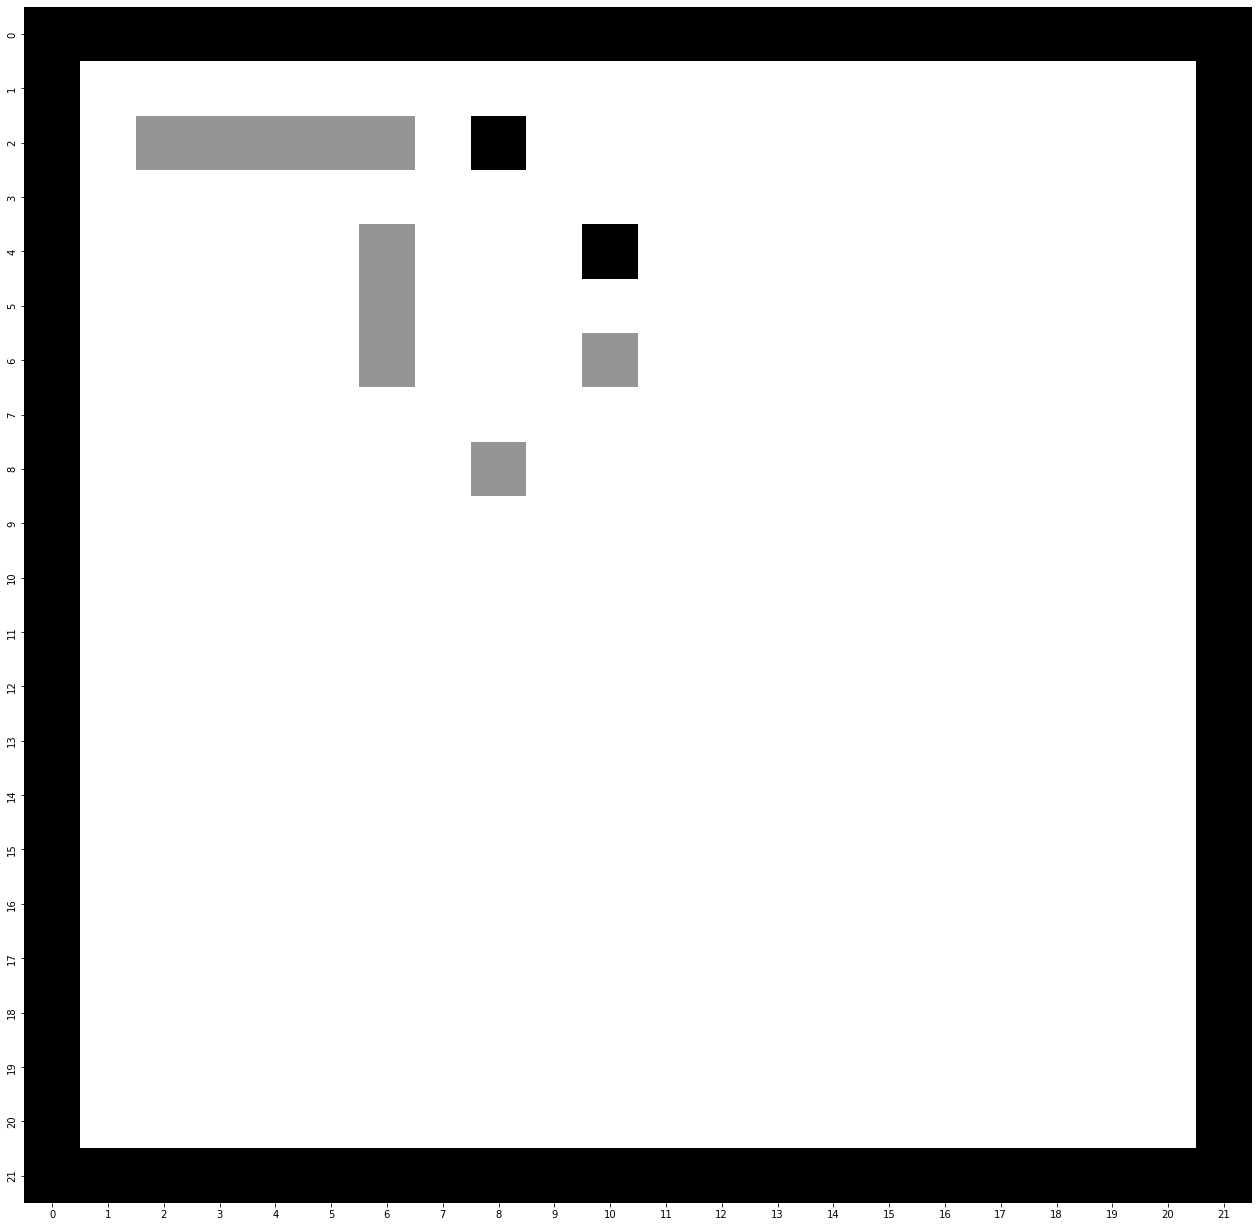

In [190]:
# Define start and goal positions
#START = (1,1)

print(GOALLIST)

ActionsWCamera=[]

cantreachgoal =False 
# Run the A*S algorithm for path finding
lol = []
FinalActions =[]
for i in range(len(GOALLIST)-1):
    if cantreachgoal == True:
        BT = lol[i-1][-2]
        nodesExplored, pathsExplored, nodesProcessed = astar_search(mazegraph, start = BT , goal = GOALLIST[i+1])
        path, cantreachgoal,actions= reconstruct_path(nodesExplored, start = BT, goal = GOALLIST[i+1])
    else:    
        nodesExplored, pathsExplored, nodesProcessed = astar_search(mazegraph, start = GOALLIST[i] , goal = GOALLIST[i+1])
        path, cantreachgoal,actions = reconstruct_path(nodesExplored, start = GOALLIST[i], goal = GOALLIST[i+1])

    lol.append(path)
    FinalActions+=actions
#     print(lol)
    print("path",i, "=", path)
    ActionsWCamera+=actions
    ActionsWCamera.append('Camera')
    
    
print("Actions sent with Camera", ActionsWCamera)
# i=0
# nodesExplored, pathsExplored, nodesProcessed = astar_search(mazegraph, start = GOALLIST[i] , goal = GOALLIST[i+1])
# path, cantreachgoal = reconstruct_path(nodesExplored, start = GOALLIST[i], goal = GOALLIST[i+1])


# Basic measures for the algorithm
print("A*-Search (A*S)")
print()

totalNodes = np.count_nonzero(maze == 0)
print("Total nodes in maze :", totalNodes)
print("Total nodes visited :", nodesProcessed, " | ", np.round(100*(nodesProcessed/totalNodes),2), "%")
print("Final path distance :", len(path))
print()

# Print the path and show using helper functions
print("Path through the Maze :", lol)
print("Actions throught the Maze", FinalActions)
showBinaryMazePath(maze,lol)
#showBinaryMazePath(maze, path)

In [191]:
#Creating Json File

import json
file = "testing123.json"

def write_json(data,filename = "testing234.json"):
    with open(filename, "w") as f:
        json.dump(data, f, indent = 4)
        
data = FinalActions
write_json(data)

In [192]:
#Trying Out tkinter to simulate Andriod.
import tkinter as tk
from tkinter import ttk
from tkinter import *
from PIL import Image,ImageTk
import time

class BackgroundFrame(tk.Tk):
    def __init__(self,*args,**kwargs): #args = arguments, kwargs refers to keyword arguments.
        tk.Tk.__init__(self,*args,**kwargs)     #initialize tkinter

#         tk.Tk.iconbitmap(self, default = "sanicisgood.ico")
#         tk.Tk.wm_title(self, "Gotta GO fast")
        
        ws = self.winfo_screenwidth() #get the pixels lengths  for width
        hs = self.winfo_screenheight() #get the  pixel lengths for the height
        print(ws,hs)
        self.geometry('%dx%d'%(ws*0.5,hs*0.5)) #make the window almost to the full screen
        
    
        container = tk.Frame(height = hs*0.5, width = ws*0.5)
        container.pack(side="top",fill="both", expand=True )
        
        #fill will fill in the space that is allocated in
        #expand is beyond the limits that you set.
        
       
        container.grid_rowconfigure(0,weight=1) #0 is the setting of minimum size
        container.grid_columnconfigure(0,weight=1) #weight is the priority
        frame  = mainPage(container,self)
        frame.grid(row=0, column= 0, sticky= "nsew")
        self.tkraise()
        
    
        
class mainPage(tk.Frame): #inherits from tk.frame
        def __init__(self, parent, controller):
            self.controller = controller
            tk.Frame.__init__(self,parent)
            w= self.winfo_screenwidth() *0.5-30
            h = self.winfo_screenheight()*0.5-30

        
            self.viewGrid = Canvas(self, width=w, height=h,bg="#ddd")
            self.viewGrid.pack(side="top", fill= "both", expand = True)
            ADD = ttk.Button(self, text="Add Entry Boxes",command = self.addmoreboxes)
            ADD.pack(side="right", ipady=0, ipadx=7)
        
            
            #viewGrid.grid(row = 20, column =20, sticky = "nsew")
            
 
            gridWidth= int(w/20)
            gridHeight = 34
            
            print(gridWidth, gridHeight)
            rowNumber = 0
            for row in range(20):
                for col in range(20):
                    rect = self.viewGrid.create_rectangle(col*gridWidth,row*gridHeight, (col+1)*gridWidth, (row+1)*gridHeight, fill = 'grey')
            carimg= (Image.open("CarImage.png"))
            self.resizedcar_image = carimg.resize((102,102), Image.ANTIALIAS)
            self.newcar_image = ImageTk.PhotoImage(self.resizedcar_image) #rotation degree is towards the left
            
            Xstart, Ystart = 51, 629
            self.testingimage = self.viewGrid.create_image(Xstart,Ystart,image=self.newcar_image)
            
                       
            obstimg = (Image.open("Obstacle Image.png"))
            resizedobstacle_image = obstimg.resize((34,34), Image.ANTIALIAS)
            
            obstonly = Image.open("Obstacle Only.png")
            resizedobstacle = obstonly.resize((34,34), Image.ANTIALIAS)
            
            self.obstacleArray=[]
            self.obstacleArray2 = [] #contains obstacle w no image
            for x in range(len(ObstacleList)):
                rotationalvalue = 0
                xvalue = ObstacleList[x][0] * 34+17
                yvalue = ObstacleList[x][1] * 34 +17
                
                print(ObstacleList[x])
                if(ObstacleList[x][2] == 'N'):
                    rotationalvalue  = 90
                elif (ObstacleList[x][2] == 'W'):
                    rotationalvalue  = 180
                elif(ObstacleList[x][2] == 'S'):
                    rotationalvalue= 270
                elif(ObstacleList[x][2] == 'E'):
                    rotationalvalue = 0
                
                if(ObstacleList[x][2] != 'NIL'):
                    self.newobst_image= ImageTk.PhotoImage(resizedobstacle_image.rotate(rotationalvalue))
                    self.obstacleArray.append(self.newobst_image)
                    self.obstacleimage = self.viewGrid.create_image(xvalue,680-yvalue,image=self.obstacleArray[-1])
                else:
                    self.newobst = ImageTk.PhotoImage(resizedobstacle)
                    self.obstacleArray.append(self.newobst)
                    self.obstacleimage = self.viewGrid.create_image(xvalue,680-yvalue,image=self.obstacleArray[-1])
                
                
            self.currentdirection ="N" #This position is in accordance to the python tkinter board. 
            PathIteration = ttk.Button(self, text="PathIteration",command = self.pathsequence)
            PathIteration.pack(side="right", ipady=0, ipadx=7)

            self.value=0
            
            
            
        def pathsequence(self):
                self.stepactions = FinalActions[self.value]
                print(self.stepactions)
                print(self.value)
                if(self.stepactions == "FW010"):
                    if(self.currentdirection == "N"):
                        self.viewGrid.move(self.testingimage, 0, -34)
                    elif(self.currentdirection == "S"):
                        self.viewGrid.move(self.testingimage, 0, 34)
                    elif(self.currentdirection == "W"):
                        self.viewGrid.move(self.testingimage,-34, 0)
                    elif(self.currentdirection == "E"):
                        self.viewGrid.move(self.testingimage,34,0)
                if(self.stepactions == "BW010"):
                    if(self.currentdirection == "N"):
                        self.viewGrid.move(self.testingimage, 0, 34)
                    elif(self.currentdirection == "S"):
                        self.viewGrid.move(self.testingimage, 0, -34)
                    elif(self.currentdirection == "W"):
                        self.viewGrid.move(self.testingimage,34, 0)
                    elif(self.currentdirection == "E"):
                        self.viewGrid.move(self.testingimage,-34,0)

                        
                if(self.stepactions == "FL090"):
                    if(self.currentdirection == "N"):
                        self.viewGrid.move(self.testingimage, -68, -68)
                        self.currentdirection = "W"
                        

                    elif(self.currentdirection == "S"):
                        self.viewGrid.move(self.testingimage, 68, 68)
                        self.currentdirection = "E"

                    elif(self.currentdirection == "W"):
                        self.viewGrid.move(self.testingimage, -68, 68)
                        self.currentdirection = "S"

                    elif(self.currentdirection == "E"):
                        self.viewGrid.move(self.testingimage,68,-68)
                        self.currentdirection  = "N"
                    
                    self.moveandrotatecarimage()


                if(self.stepactions == "FR090"):
                    if(self.currentdirection == "N"):
                        self.viewGrid.move(self.testingimage, 68, -68)
                        self.currentdirection = "E"

                    elif(self.currentdirection == "S"):
                        self.viewGrid.move(self.testingimage, -68, 68)
                        self.currentdirection  = "W"

                    elif(self.currentdirection == "W"):
                        self.viewGrid.move(self.testingimage,-68, -68)
                        self.currentdirection  = "N"

                    elif(self.currentdirection == "E"):
                        self.viewGrid.move(self.testingimage,68,68)
                        self.currentdirection = "S"
                        
                    self.moveandrotatecarimage()

                if(self.stepactions == "BL090"):
                    if(self.currentdirection == "N"):
                        self.viewGrid.move(self.testingimage, -68, 68)
                        self.currentdirection = "E"

                    elif(self.currentdirection == "S"):
                        self.viewGrid.move(self.testingimage, 68, -68)
                        self.currentdirection  = "W"

                    elif(self.currentdirection == "W"):
                        self.viewGrid.move(self.testingimage, 68, 68)
                        self.currentdirection = "N"


                    elif(self.currentdirection == "E"):
                        self.viewGrid.move(self.testingimage,-68,-68)
                        self.currentdirection  = "S"
                        
                    self.moveandrotatecarimage()


                if(self.stepactions == "BR090"):
                    if(self.currentdirection == "N"):
                        self.viewGrid.move(self.testingimage, 68, 68)
                        self.currentdirection = "W"

                    elif(self.currentdirection == "S"):
                        self.viewGrid.move(self.testingimage, -68, -68)
                        self.currentdirection = "E"

                    elif(self.currentdirection == "W"):
                        self.viewGrid.move(self.testingimage,68, -68)
                        self.currentdirection = "S"

                    elif(self.currentdirection == "E"):
                        self.viewGrid.move(self.testingimage,-68,68)
                        self.currentdirection  = "N"
                    self.moveandrotatecarimage()
                
                self.value+=1


                
                
            
        def addmoreboxes(self):
            print("test")
            self.viewGrid.move(self.testingimage, 102, -102)
            curposition  = self.viewGrid.coords(self.testingimage)
            print(curposition)
            
        def moveandrotatecarimage(self):
            curposition  = self.viewGrid.coords(self.testingimage)
            
            if(self.currentdirection == "W"):
                self.newcar_image = ImageTk.PhotoImage(self.resizedcar_image.rotate(90)) #rotation degree is towards the left
            elif(self.currentdirection == "S"):
                self.newcar_image = ImageTk.PhotoImage(self.resizedcar_image.rotate(180)) 
            elif(self.currentdirection == "E"):
                self.newcar_image = ImageTk.PhotoImage(self.resizedcar_image.rotate(270)) 
            elif(self.currentdirection =="N"):
                self.newcar_image = ImageTk.PhotoImage(self.resizedcar_image.rotate(0))
            self.viewGrid.delete(self.testingimage)
            self.testingimage = self.viewGrid.create_image(curposition[0],curposition[1],image=self.newcar_image)
            


app = BackgroundFrame()
app.mainloop() #inherited from tkinter

1440 900
34 34
(1, 7, 'W')
(3, 9, 'S')
FW010
0
FW010
1
FW010
2
FW010
3
BW010
4
BW010
5
FR090
6
FW010
7
FW010
8
FL090
9
FL090
10


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\65978\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\65978\AppData\Local\Temp/ipykernel_15596/1945103089.py", line 111, in pathsequence
    self.stepactions = FinalActions[self.value]
IndexError: list index out of range
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\65978\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\65978\AppData\Local\Temp/ipykernel_15596/1945103089.py", line 111, in pathsequence
    self.stepactions = FinalActions[self.value]
IndexError: list index out of range
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\65978\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\65978\AppData\Local\Temp/ipykernel_15596/1945103089.py", line 111, in pathsequence
    sel

In [193]:
print(len(FinalActions))

11
